<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1">Import Libraries</a></span></li><li><span><a href="#Import-Data" data-toc-modified-id="Import-Data-2">Import Data</a></span></li><li><span><a href="#Merging-Dataframes" data-toc-modified-id="Merging-Dataframes-3">Merging Dataframes</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-4">Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Check-for-and-address-consistency-in-&quot;country&quot;-column" data-toc-modified-id="Check-for-and-address-consistency-in-&quot;country&quot;-column-4.1">Check for and address consistency in "country" column</a></span></li><li><span><a href="#Check-for-and-address-consistency-in-&quot;region&quot;-column" data-toc-modified-id="Check-for-and-address-consistency-in-&quot;region&quot;-column-4.2">Check for and address consistency in "region" column</a></span></li><li><span><a href="#Check-for-and-address-duplicates" data-toc-modified-id="Check-for-and-address-duplicates-4.3">Check for and address duplicates</a></span></li><li><span><a href="#Check-for-and-address-missing-data" data-toc-modified-id="Check-for-and-address-missing-data-4.4">Check for and address missing data</a></span></li><li><span><a href="#Check-for-and-address-datatype-consistency-per-column" data-toc-modified-id="Check-for-and-address-datatype-consistency-per-column-4.5">Check for and address datatype consistency per column</a></span></li></ul></li><li><span><a href="#Data-profiling" data-toc-modified-id="Data-profiling-5">Data profiling</a></span><ul class="toc-item"><li><span><a href="#Descriptive-Stats" data-toc-modified-id="Descriptive-Stats-5.1">Descriptive Stats</a></span></li><li><span><a href="#Datatypes" data-toc-modified-id="Datatypes-5.2">Datatypes</a></span></li><li><span><a href="#Count-of-missing-values" data-toc-modified-id="Count-of-missing-values-5.3">Count of missing values</a></span></li><li><span><a href="#Data-quality-issues" data-toc-modified-id="Data-quality-issues-5.4">Data quality issues</a></span></li><li><span><a href="#Distribution-of-values" data-toc-modified-id="Distribution-of-values-5.5">Distribution of values</a></span></li><li><span><a href="#Check-for-and-address-any-outliers" data-toc-modified-id="Check-for-and-address-any-outliers-5.6">Check for and address any outliers</a></span></li></ul></li><li><span><a href="#Export-the-cleaned-dataframe" data-toc-modified-id="Export-the-cleaned-dataframe-6">Export the cleaned dataframe</a></span></li></ul></div>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sn
import scipy

## Import Data

In [2]:
# make a path
path = r'/Users/profkdfischer/World Happiness Report Analysis'

In [3]:
# import the 9 csv files of the WHR dataset
df1 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2015.csv'))
df2 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2016.csv'))
df3 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2017.csv'))
df4 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2018.csv'))
df5 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2019.csv'))
df6 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2020.csv'))
df7 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2021.csv'))
df8 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2022.csv'))
df9 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'WHR_2023.csv'))

## Merging Dataframes

In [4]:
# create a list of the dataframes
dfs = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

In [5]:
# add a year column to each df
years = range(2015, 2024)
for i in range(len(dfs)):
    dfs[i]['year'] = years[i]

In [6]:
# concatenate the dfs in a stack 
whr_df = pd.concat(dfs, ignore_index = True)

In [7]:
# check the shape
whr_df.shape

(1367, 10)

In [8]:
# just show me 2 decimal places
pd.set_option('display.precision', 2)

In [9]:
# check the head
whr_df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.59,1.40,1.35,0.94,0.67,0.30,0.42,2015
1,Iceland,Western Europe,7.56,1.30,1.40,0.95,0.63,0.44,0.14,2015
2,Denmark,Western Europe,7.53,1.33,1.36,0.87,0.65,0.34,0.48,2015
3,Norway,Western Europe,7.52,1.46,1.33,0.89,0.67,0.35,0.37,2015
4,Canada,North America and ANZ,7.43,1.33,1.32,0.91,0.63,0.46,0.33,2015


In [10]:
# check the datatypes
whr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


In [11]:
# check the stats
whr_df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.00,1367.00,1367.00,1366.00,1367.00,1367.00,1366.00,1367.00
mean,5.44,1.02,1.05,0.58,0.45,0.20,0.13,2018.90
std,1.12,0.45,0.33,0.25,0.16,0.11,0.11,2.56
min,1.86,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,4.60,0.70,0.83,0.40,0.36,0.12,0.06,2017.00
50%,5.44,1.04,1.08,0.61,0.47,0.18,0.10,2019.00
75%,6.26,1.34,1.30,0.78,0.57,0.25,0.17,2021.00
max,7.84,2.21,1.64,1.14,0.77,0.84,0.59,2023.00


## Data Cleaning

### Check for and address consistency in "country" column

In [12]:
# show all rows
pd.set_option('display.max_rows', None)

In [13]:
# list entries in country column
whr_df['country'].value_counts().sort_index()

country
Afghanistan                   9
Albania                       9
Algeria                       9
Angola                        4
Argentina                     9
Armenia                       9
Australia                     9
Austria                       9
Azerbaijan                    8
Bahrain                       9
Bangladesh                    9
Belarus                       8
Belgium                       9
Belize                        3
Benin                         9
Bhutan                        5
Bolivia                       9
Bosnia and Herzegovina        9
Botswana                      9
Brazil                        9
Bulgaria                      9
Burkina Faso                  9
Burundi                       7
Cambodia                      9
Cameroon                      9
Canada                        9
Central African Republic      5
Chad                          9
Chile                         9
China                         9
Colombia                      9


Comment: After sorting alphabetically, there should be 9 values for each country, possibly fewer if a country wasn't included in some years. However, there should be none over 9, and a value under 5 should be checked for duplication or spelling error.

Although several countries changed their name or are known by multiple names, I will rename them here to get one name per country for the purposes of consistency:
Turkiye -> Turkey, Congo -> Congo (Brazzaville), Czechia -> Czech Republic, Eswatini -> Swaziland, Somaliland region -> Somaliland Region, State of Palestine -> Palestinian Territories, Taiwan Province of China -> Taiwan.

In [14]:
whr_df['country'].replace({"Turkiye" : "Turkey"}, inplace = True)
whr_df['country'].replace({"Congo" : "Congo (Brazzaville)"}, inplace = True)
whr_df['country'].replace({"Czechia" : "Czech Republic", }, inplace = True)
whr_df['country'].replace({"Eswatini" : "Swaziland", }, inplace = True)
whr_df['country'].replace({"Somaliland region" : "Somaliland Region", }, inplace = True)
whr_df['country'].replace({"State of Palestine" : "Palestinian Territories", }, inplace = True)
whr_df['country'].replace({"Taiwan Province of China" : "Taiwan", }, inplace = True)

Prior to 2018, there was a "Cyprus" and a "North Cyprus", in 2018 and 2019, there were 2 "Cyprus", and then in 2020, back to "Cyprus" and a "North Cyprus". The "Cyprus" with the low perception of corruption (<0.1) is the one that stays as "Cyprus", while the one with the higher perception of corruption (>0.1) becomes "North Cyprus".

In [15]:
whr_df.loc[(whr_df['country'] == "Cyprus") & (whr_df['year'] == 2018) & (whr_df['perceptions_of_corruption'] > 0.1), "country"] = "Northern Cyprus"
whr_df.loc[(whr_df['country'] == "Cyprus") & (whr_df['year'] == 2019) & (whr_df['perceptions_of_corruption'] > 0.1), "country"] = "Northern Cyprus"

In [16]:
# change some additional country names for consistency in Exercise 6.3
whr_df["country"].replace({"Serbia":"Republic of Serbia","Somaliland Region": "Somaliland","North Cyprus": "Northern Cyprus", "North Macedonia": "Macedonia"}, inplace=True)


In [18]:
# list entries in country column
whr_df['country'].value_counts().sort_index()

country
Afghanistan                  9
Albania                      9
Algeria                      9
Angola                       4
Argentina                    9
Armenia                      9
Australia                    9
Austria                      9
Azerbaijan                   8
Bahrain                      9
Bangladesh                   9
Belarus                      8
Belgium                      9
Belize                       3
Benin                        9
Bhutan                       5
Bolivia                      9
Bosnia and Herzegovina       9
Botswana                     9
Brazil                       9
Bulgaria                     9
Burkina Faso                 9
Burundi                      7
Cambodia                     9
Cameroon                     9
Canada                       9
Central African Republic     5
Chad                         9
Chile                        9
China                        9
Colombia                     9
Comoros                      7


### Check for and address consistency in "region" column

In [19]:
# list entries in region column
whr_df['region'].value_counts().sort_index()

region
Africa                                  2
Central and Eastern Europe            214
Commonwealth of Independent States     44
East Asia                              54
Latin America and Caribbean           190
Middle East and North Africa          161
North America and ANZ                  36
South Asia                             61
Southeast Asia                         80
Sub-Saharan Africa                    337
Western Europe                        188
Name: count, dtype: int64

Comment: one issue with the 2 countries in Africa.

In [20]:
# check which 2 countries they are:
whr_df[whr_df['region'] == "Africa"]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
90,Somaliland,Africa,5.06,0.19,0.95,0.44,0.47,0.50,0.40,2015
254,Somaliland,Africa,5.06,0.26,0.76,0.33,0.39,0.51,0.37,2016


In [21]:
# change their region to Sub-Saharan Africa:
whr_df.loc[(whr_df['country'] == "Somaliland Region") & (whr_df['region'] == "Africa"), "region"] = "Sub-Saharan Africa"

In [22]:
# list entries in region column
whr_df['region'].value_counts().sort_index()

region
Africa                                  2
Central and Eastern Europe            214
Commonwealth of Independent States     44
East Asia                              54
Latin America and Caribbean           190
Middle East and North Africa          161
North America and ANZ                  36
South Asia                             61
Southeast Asia                         80
Sub-Saharan Africa                    337
Western Europe                        188
Name: count, dtype: int64

### Check for and address duplicates

In [23]:
whr_df[whr_df.duplicated()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year


Comment: there are no duplicates.

### Check for and address missing data

In [24]:
whr_df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64

In [25]:
# which country is missing "healthy_life_expectancy"
whr_df[whr_df['healthy_life_expectancy'].isnull()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1328,Palestinian Territories,Middle East and North Africa,4.91,1.14,1.31,NaN,0.42,0.07,0.07,2023


In [26]:
# replace the NaN with the average of "healthy_life_expectancy" for Palestinian Territories
mean_hle = whr_df.loc[(whr_df["country"] == "Palestinian Territories"), 'healthy_life_expectancy'].mean()
whr_df['healthy_life_expectancy'].fillna(mean_hle, inplace = True)

In [27]:
# which country is missing "perceptions_of_corruption"
whr_df[whr_df['perceptions_of_corruption'].isnull()]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
489,United Arab Emirates,Middle East and North Africa,6.77,2.1,0.78,0.67,0.28,0.19,NaN,2018


In [28]:
# replace the NaN with the average of "perceptions_of_corruption" for United Arab Emirates
mean_poc = whr_df.loc[(whr_df["country"] == "United Arab Emirates"), 'perceptions_of_corruption'].mean()
whr_df['perceptions_of_corruption'].fillna(mean_poc, inplace = True)

In [29]:
whr_df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

Comment: 2 missing values were found and imputed with the average values for the column for the country that was missing the value.

### Check for and address datatype consistency per column

In [30]:
# check each column for mixed datatypes
for col in whr_df.columns.tolist():
  weird = (whr_df[[col]].applymap(type) != whr_df[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (whr_df[weird]) > 0:
    print (col)
  else:
    print('consistent')

consistent
consistent
consistent
consistent
consistent
consistent
consistent
consistent
consistent
consistent


/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_3361/158766909.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (whr_df[[col]].applymap(type) != whr_df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_3361/158766909.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (whr_df[[col]].applymap(type) != whr_df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_3361/158766909.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (whr_df[[col]].applymap(type) != whr_df[[col]].iloc[0].apply(type)).any(axis = 1)
/var/folders/s0/b631rndx6sv1py5f9s6wc7y00000gn/T/ipykernel_3361/158766909.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (whr_df[[col]].applymap(type) != whr_df[[col]].iloc[0].apply(type)

Comment: no columns with mixed datatypes found.

## Data profiling

### Descriptive Stats

In [31]:
whr_df.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,1367.00,1367.00,1367.00,1367.00,1367.00,1367.00,1367.00,1367.00
mean,5.44,1.02,1.05,0.58,0.45,0.20,0.13,2018.90
std,1.12,0.45,0.33,0.25,0.16,0.11,0.11,2.56
min,1.86,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,4.60,0.70,0.83,0.40,0.36,0.12,0.06,2017.00
50%,5.44,1.04,1.08,0.61,0.47,0.18,0.10,2019.00
75%,6.26,1.34,1.30,0.78,0.57,0.25,0.17,2021.00
max,7.84,2.21,1.64,1.14,0.77,0.84,0.59,2023.00


### Datatypes

In [32]:
whr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1367 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1367 non-null   float64
 9   year                          1367 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 106.9+ KB


### Count of missing values

In [33]:
whr_df.isnull().sum()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       0
year                            0
dtype: int64

### Data quality issues

Comment: The after renaming some countries and regions for consistency, and filling in 2 missing values (see above in the "Data Cleaning" section), there are no obvious data quality issues.

### Distribution of values

Comment: For categorical variable columns, show value counts. For continuous variable columns, show histograms.

In [34]:
# Value counts for "country"
whr_df['country'].value_counts()

country
Switzerland                  9
Honduras                     9
Bosnia and Herzegovina       9
Dominican Republic           9
Mongolia                     9
Greece                       9
Lebanon                      9
Hungary                      9
Tajikistan                   9
Macedonia                    9
Tunisia                      9
Palestinian Territories      9
Bangladesh                   9
Iran                         9
Ukraine                      9
Iraq                         9
Albania                      9
Morocco                      9
Hong Kong S.A.R. of China    9
Jordan                       9
Indonesia                    9
Vietnam                      9
Turkey                       9
Kyrgyzstan                   9
Nigeria                      9
Pakistan                     9
Iceland                      9
Philippines                  9
China                        9
Zambia                       9
Romania                      9
Republic of Serbia           9


In [35]:
# Value counts for "region"
whr_df['region'].value_counts()

region
Sub-Saharan Africa                    337
Central and Eastern Europe            214
Latin America and Caribbean           190
Western Europe                        188
Middle East and North Africa          161
Southeast Asia                         80
South Asia                             61
East Asia                              54
Commonwealth of Independent States     44
North America and ANZ                  36
Africa                                  2
Name: count, dtype: int64

<Axes: >

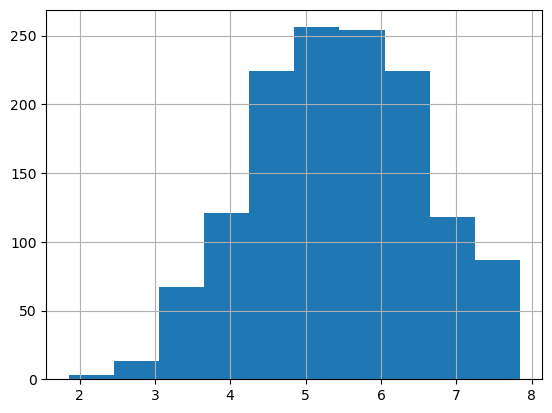

In [36]:
# Frequency counts for "happiness_score"
whr_df['happiness_score'].hist()

<Axes: >

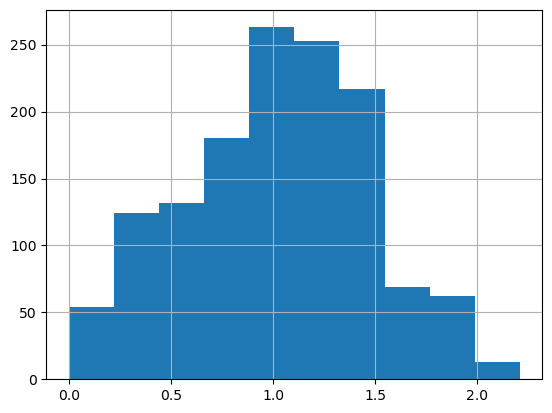

In [37]:
# Frequency counts for "gdp_per_capita"
whr_df['gdp_per_capita'].hist()

<Axes: >

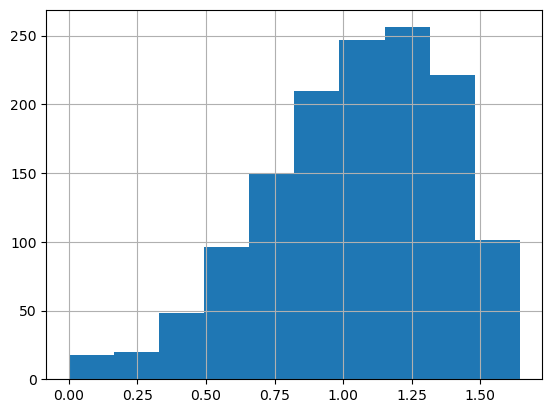

In [38]:
# Frequency counts for "social_support"
whr_df['social_support'].hist()

<Axes: >

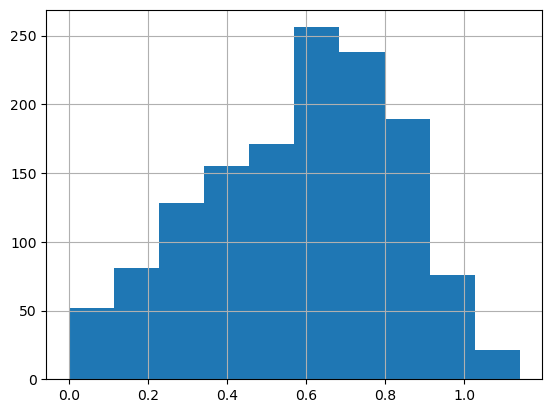

In [39]:
# Frequency counts for "healthy_life_expectancy"
whr_df['healthy_life_expectancy'].hist()

<Axes: >

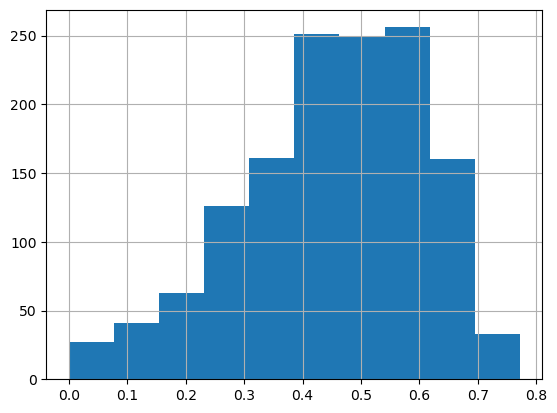

In [40]:
# Frequency counts for "freedom_to_make_life_choices"
whr_df['freedom_to_make_life_choices'].hist()

<Axes: >

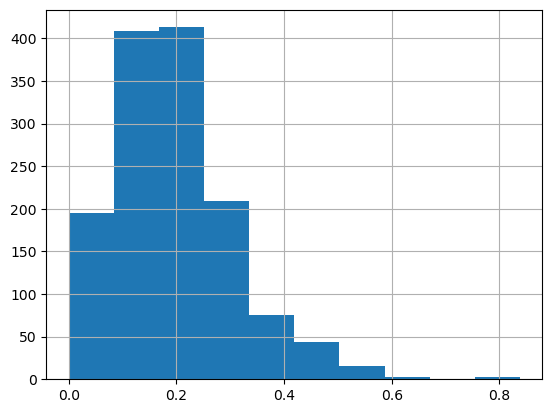

In [41]:
# Frequency counts for "generosity"
whr_df['generosity'].hist()

<Axes: >

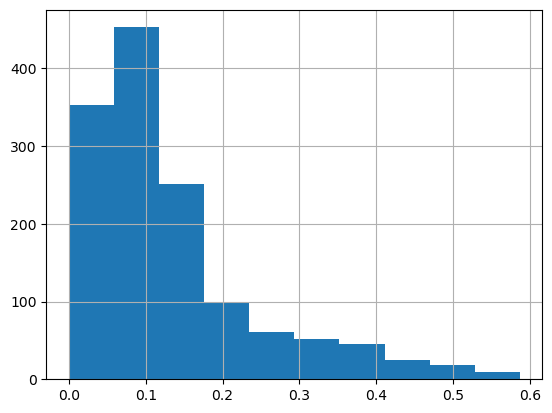

In [42]:
# Frequency counts for "perceptions_of_corruption"
whr_df['perceptions_of_corruption'].hist()

### Check for and address any outliers

In [43]:
# find the sums of outliers for the whole dataframe
def detect_outliers_iqr(df, threshold = 1.5):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return ((df < lower_bound) | (df > upper_bound)).sum()

df_n = whr_df.iloc[:, 2:]
outliers = detect_outliers_iqr(df_n)
print(outliers)

happiness_score                   1
gdp_per_capita                    0
social_support                   14
healthy_life_expectancy           0
freedom_to_make_life_choices     17
generosity                       50
perceptions_of_corruption       110
year                              0
dtype: int64


In [44]:
# find the sums of outliers for a single column
# replace the column name in the last line to see the outliers for that column

def detect_outliers_iqr(column, threshold=1.5):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    outliers = (column < lower_bound) | (column > upper_bound)
    return outliers

whr_df[detect_outliers_iqr(whr_df['happiness_score'])]

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
1366,Afghanistan,South Asia,1.86,0.65,0.0,0.09,0.0,0.09,0.06,2023


Comment: the outlier results may be helpful in formulating a hypothesis.

## Export the cleaned dataframe

In [45]:
# export the cleaned whr_df
whr_df.to_csv(os.path.join(path, '02 Data','Prepared Data', 'whr_df.csv'))